In [ ]:
import spacy as sp
from spacy.lang.en.stop_words import STOP_WORDS
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import pandas as pd

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
import string

In [ ]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
from gensim.models import Phrases

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

In [ ]:
!pip install matplotlib wordcloud

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df=pd.read_csv("/content/spam_hamm_dataset.csv", encoding='latin1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
df=df.drop(['label_num','Unnamed: 0'], axis=1)

In [ ]:
df=df[:500]

**Performing LDA**

In [ ]:
# Initialize the WordNetLemmatizer and set of stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
docs=[]
unique_tokens = set() ## to ensure only unique tokens are added

# Define a translation table to remove punctuation
translator = str.maketrans('', '', string.punctuation)

for index, row in df.iterrows():
    text = row['text']

    # Tokenize the text, convert to lowercase, remove punctuation, and filter stopwords and "subject"
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token != "subject" and token not in stop_words]

    unique_tokens.update(tokens) ## updating the unique tokens
    docs.append(tokens)

    dataaa = " ".join(tokens)

    # Update the 'processed__text' column in the DataFrame
    df.at[index, 'processed__text'] = dataaa
    #print(tokens)


id2word = corpora.Dictionary(docs)

# Create a bag-of-words representation (corpus) for the tokenized documents
corpus = [id2word.doc2bow(doc) for doc in docs]

# Print the dictionary and the corpus
print(id2word)
print(corpus)

Dictionary<9322 unique tokens: ['activity', 'asap', 'change', 'control', 'daily']...>
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 2)], [(2, 1), (33, 3), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 2), (52, 3), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 2), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 4), (87, 3), (88, 1), (89, 2), (90, 4), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

                                ## dividing text into topics and finding relevance of words to that

In [ ]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.040*"deal" + 0.025*"meter" + 0.022*"tenaska" + 0.019*"volume" + 0.017*"daren" + 0.014*"iv" + 0.014*"please" + 0.011*"thanks" + 0.011*"purchase" + 0.010*"gas"'), (1, '0.011*"u" + 0.011*"www" + 0.010*"com" + 0.009*"r" + 0.008*"g" + 0.008*"http" + 0.006*"free" + 0.006*"computron" + 0.006*"e" + 0.006*"contact"'), (2, '0.018*"company" + 0.011*"statement" + 0.010*"stock" + 0.010*"communication" + 0.006*"information" + 0.006*"report" + 0.006*"doc" + 0.005*"security" + 0.005*"future" + 0.005*"within"'), (3, '0.148*"ect" + 0.078*"hou" + 0.052*"enron" + 0.013*"gas" + 0.012*"corp" + 0.012*"cc" + 0.011*"deal" + 0.011*"pm" + 0.010*"meter" + 0.009*"j"'), (4, '0.022*"hpl" + 0.016*"enron" + 0.014*"thru" + 0.014*"gas" + 0.011*"sat" + 0.010*"teco" + 0.010*"said" + 0.010*"outage" + 0.008*"pt" + 0.008*"sun"'), (5, '0.037*"cut" + 0.009*"epgt" + 0.008*"spot" + 0.007*"el" + 0.006*"paso" + 0.005*"josey" + 0.005*"ehronline" + 0.005*"url" + 0.005*"trevino" + 0.004*"setting"'), (6, '0.025*"com" + 0.014*"

In [ ]:
print('Perplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. the lower the better.

coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity:  -7.832759793681178
Coherence Score:  0.44654829702487514


**USING UNIQUE TOKENS**

In [ ]:
print(unique_tokens)

{'stimulated', 'kraft', 'ansi', 'removalll', 'structuring', 'potent', 'sonant', 'dtaill', 'curry', 'warranty', 'vacation', 'guranteed', 'enhanced', 'tunnel', 'grimstead', 'flagged', 'seaman', 'softswitches', 'liked', 'carthage', 'innermostkinglet', 'become', 'retaifl', 'stationery', 'mix', 'timothy', 'recoverable', 'tu', 'hernandez', 'storin', 'eric', 'perform', 'ambi', 'larger', 'continuum', 'katy', 'skim', 'betel', 'pricing', 'intend', 'araneous', 'schedule', 'lessen', 'kaase', 'habitation', 'pgp', 'thou', 'cialfris', 'proprietor', 'sufficeth', 'undervalued', 'anyways', 'climatic', 'enlarged', 'playboy', 'pritchard', 'executable', 'physically', 'deliberation', 'critical', 'obveijlnf', 'ezvtyusk', 'montenegrin', 'attached', 'genre', 'scot', 'heating', 'rfuvrijmw', 'accumuiated', 'discounted', 'oaohkv', 'moving', 'demokritos', 'lee', 'transaction', 'quel', 'typo', 'benefit', 'protracted', 'apart', 'exploratory', 'european', 'exercise', 'subsequently', 'right', 'barbary', 'hyperbola', '

In [ ]:
print(len(unique_tokens))

9322


In [ ]:
print(len(df))

500


In [ ]:
particular_vocabulary_consistency = len(unique_tokens) / len(df) ## telling how many unique tokens are in each row
print(particular_vocabulary_consistency) ## 18.644 means 18.644 unique tokens each row

18.644


**Checking frequency of words**

In [ ]:
combined_text = ' '.join(df['processed__text'])
tokens = nltk.word_tokenize(combined_text)
word_freq = Counter(tokens)


In [ ]:
words = list(word_freq.keys())
frequencies = list(word_freq.values())

In [ ]:
print(words)

['enron', 'methanol', 'meter', 'follow', 'note', 'gave', 'monday', 'preliminary', 'flow', 'data', 'provided', 'daren', 'please', 'override', 'pop', 'daily', 'volume', 'presently', 'zero', 'reflect', 'activity', 'obtain', 'gas', 'control', 'change', 'needed', 'asap', 'economics', 'purpose', 'hpl', 'nom', 'january', 'see', 'attached', 'file', 'hplnol', 'xl', 'neon', 'retreat', 'ho', 'around', 'wonderful', 'time', 'year', 'leader', 'know', 'extremely', 'hectic', 'tough', 'think', 'anything', 'past', 'holiday', 'life', 'go', 'week', 'december', 'like', 'minute', 'calender', 'handed', 'beginning', 'fall', 'semester', 'scheduled', 'weekend', 'youth', 'minister', 'conference', 'brad', 'dustin', 'connected', 'going', 'date', 'following', 'come', 'part', 'need', 'agree', 'important', 'u', 'get', 'together', 'recharge', 'battery', 'far', 'spring', 'lot', 'trouble', 'difficult', 'away', 'without', 'kid', 'etc', 'came', 'potential', 'alternative', 'let', 'prefer', 'first', 'option', 'would', 'simi

In [ ]:
print(word_freq)

Counter({'ect': 1706, 'hou': 889, 'enron': 819, 'com': 377, 'e': 317, 'gas': 306, 'deal': 295, 'please': 290, 'hpl': 246, 'pm': 222, 'cc': 211, 'corp': 195, 'price': 191, 'volume': 181, 'meter': 180, 'day': 176, 'company': 174, 'daren': 162, 'need': 157, 'mail': 154, 'pec': 154, 'u': 149, 'thanks': 147, 'new': 142, 'j': 139, 'information': 137, 'may': 137, 'get': 133, 'l': 129, 'forwarded': 128, 'know': 122, 'time': 120, 'xl': 118, 'see': 115, 'message': 115, 'one': 112, 'mmbtu': 112, 'report': 111, 'contract': 108, 'sale': 107, 'change': 105, 'attached': 103, 'farmer': 103, 'month': 101, 'http': 99, 'product': 97, 'th': 97, 'robert': 94, 'would': 93, 'nom': 91, 'inc': 91, 'stock': 90, 'order': 90, 'service': 87, 'let': 82, 'www': 82, 'statement': 81, 'flow': 80, 'r': 79, 'file': 78, 'ena': 77, 'nomination': 76, 'business': 76, 'email': 75, 'call': 74, 'today': 72, 'b': 72, 'following': 70, 'p': 70, 'contact': 70, 'daily': 69, 'also': 69, 'ticket': 68, 'free': 67, 'security': 67, 'sent

**TFIDF Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have already preprocessed your text and have a list of processed text documents
processed_documents = df['processed__text'].tolist()

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the processed documents
tfidf_matrix = vectorizer.fit_transform(processed_documents)

In [ ]:
print(tfidf_matrix) ## (0,6638) means first row's 6638 index in feature space, 0.1989 is its importance

  (0, 6638)	0.1989756374780219
  (0, 2649)	0.2360775408255409
  (0, 524)	0.2196596870499703
  (0, 5594)	0.15728489591300662
  (0, 1388)	0.12850170867762978
  (0, 1872)	0.1689335485465311
  (0, 3441)	0.09973098609053095
  (0, 5763)	0.2360775408255409
  (0, 91)	0.17748975161284047
  (0, 6867)	0.2032418332743997
  (0, 9268)	0.18535140232210168
  (0, 6436)	0.20801103441644586
  (0, 8884)	0.11427311290506842
  (0, 2106)	0.28568524931966366
  (0, 6324)	0.19511639394742125
  (0, 5945)	0.2641440472346359
  (0, 6284)	0.08285036831104105
  (0, 2130)	0.1091169601939282
  (0, 6587)	0.18255778370245135
  (0, 2139)	0.1729860688622954
  (0, 3247)	0.13718346660302327
  (0, 6415)	0.2196596870499703
  (0, 5432)	0.17748975161284047
  (0, 3452)	0.2360775408255409
  (0, 5698)	0.1544912772933563
  :	:
  (498, 1632)	0.07179030721009744
  (498, 6727)	0.07179030721009744
  (498, 6001)	0.07179030721009744
  (498, 8499)	0.07179030721009744
  (498, 1741)	0.07179030721009744
  (498, 7589)	0.06579613173601932
  (49

**Creating World Clouds**

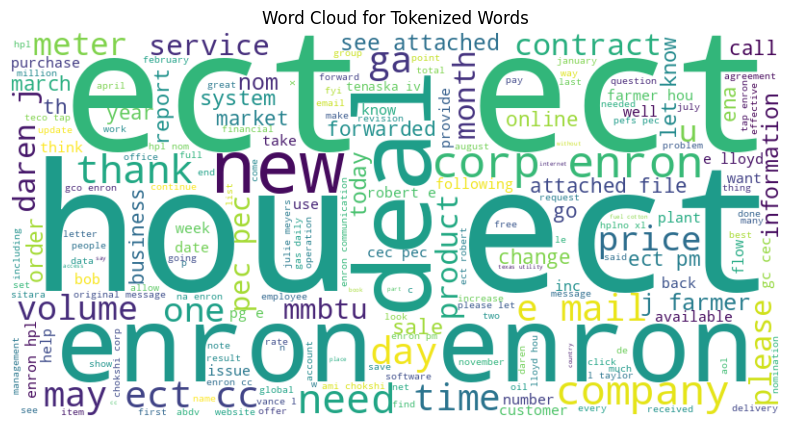

In [ ]:
## size of each word is proportional to its frequency in the text.


text = " ".join(df['processed__text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Tokenized Words")
plt.show()



